In [1]:
# Importing the libraries
import tensorflow                # Import TensorFlow, a deep learning framework for building and training neural networks
import numpy as np               # Import NumPy for numerical operations and array handling
import pandas as pd              # Import pandas for data manipulation and analysis (works with DataFrames)
import matplotlib.pyplot as plt  # Import matplotlib for plotting and visualizing data
import seaborn as sns            # Import seaborn, a visualization library built on top of matplotlib (provides prettier plots)
from sklearn.preprocessing import LabelBinarizer      # Converts categorical labels into one-hot encoded vectors
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets
from sklearn.metrics import classification_report     # Generates a report with precision, recall, f1-score, and support for each class

tensorflow.__version__

2025-10-10 17:14:42.044864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.16.2'

In [2]:
# -----------------------------
# Loading the MNIST 0-9 dataset
# -----------------------------

# Import the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# train_data: 60,000 images, each 28x28 grayscale pixels with pixel values 0–255
# train_labels: 60,000 digit labels ranging from 0 to 9
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Text(0.5, 1.0, 'Class: 7')

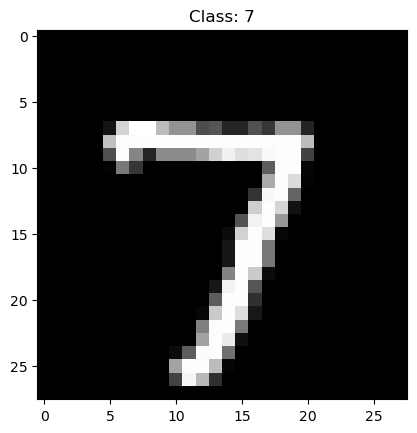

In [3]:
# Combine training and testing data into a single dataset
digits_data = np.vstack([train_data, test_data])        # Stack images vertically
digits_labels = np.hstack([train_labels, test_labels])  # Stack labels horizontally

# Display the randomly selected digit image
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap="gray")
plt.title("Class: " + str(digits_labels[index]))

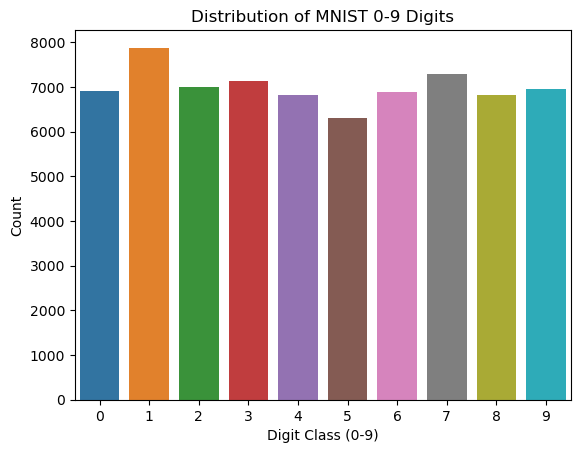

In [4]:
# Visualize the distribution of all digit classes using Seaborn
sns.countplot(x=pd.Series(digits_labels))
plt.xlabel("Digit Class (0-9)")
plt.ylabel("Count")
plt.title("Distribution of MNIST 0-9 Digits")
plt.show()

In [5]:
# ------------------------------
# Loading the Kaggle A-Z dataset
# ------------------------------

import requests  # Import requests to download files from the web
import zipfile   # Import zipfile to work with compressed .zip archives

# Send HTTP GET request to download the file
url = "https://iaexpert.academy/arquivos/alfabeto_A-Z.zip"
response = requests.get(url)

# Save the downloaded content as a local file
with open("alfabeto_A-Z.zip", "wb") as f:
    f.write(response.content)

# Open the downloaded ZIP file in read mode
with zipfile.ZipFile(file = "alfabeto_A-Z.zip", mode = "r") as zip_object:
    # Extract all contents of the ZIP file into the current directory
    zip_object.extractall("./")

# Load the CSV dataset into a Pandas DataFrame and convert all values to float32
dataset_az = pd.read_csv("A_Z Handwritten Data.csv").astype("float32")

# This dataset has 785 columns:
# - The first column ("0") contains the labels (0 = A, 1 = B, ..., 25 = Z).
# - The remaining 784 columns represent the pixel values of 28x28 grayscale images,
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Separate features (pixel values) from labels
alphabet_data = dataset_az.drop("0", axis = 1)  # Drop the first column '0' which contains the labels to get only the pixel data
alphabet_labels = dataset_az["0"]               # Store the labels (first column) in a separate variable

# Reshape the flat pixel data into 28x28 images
alphabet_data = np.reshape(a = alphabet_data.values, newshape = (alphabet_data.shape[0], 28, 28))

# train_data: 372,450 images, each 28x28 grayscale pixels with pixel values 0–255
# train_labels: 372,450 alphabet labels ranging from 0 to 25 for letters A–Z
alphabet_data.shape, alphabet_labels.shape

((372450, 28, 28), (372450,))

Text(0.5, 1.0, 'Class: 13.0')

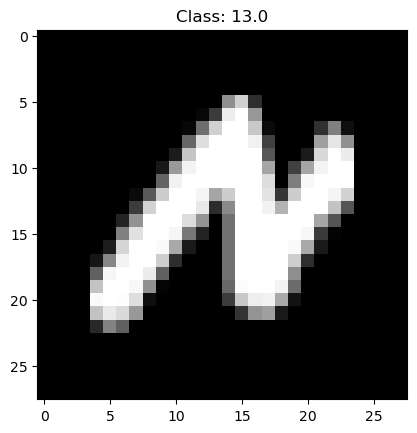

In [7]:
# Display the randomly selected alphabet image
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = "gray")
plt.title("Class: " + str(alphabet_labels[index]))

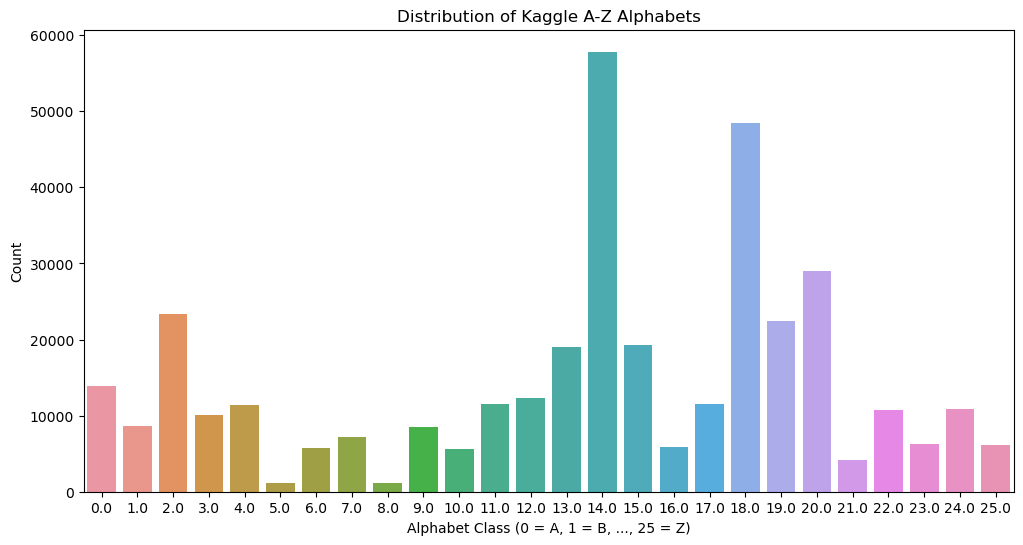

In [8]:
# Visualize the distribution of all alphabet classes using Seaborn
plt.figure(figsize = (12, 6))
sns.countplot(x = pd.Series(alphabet_labels))
plt.xlabel("Alphabet Class (0 = A, 1 = B, ..., 25 = Z)")
plt.ylabel("Count")
plt.title("Distribution of Kaggle A-Z Alphabets")
plt.show()

In [9]:
# --------------------
# Joining the datasets
# --------------------

print(np.unique(digits_labels))    # Show unique classes in the digit labels (0–9)
print(np.unique(alphabet_labels))  # Show unique classes in the alphabet labels (0–25 for A–Z)

alphabet_labels += 10              # Shift alphabet labels by +10 so they don't overlap with digits
print(np.unique(alphabet_labels))  # Now digits = 0–9, alphabets = 10–35

# Combine alphabet and digit data into a single dataset
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])
np.unique(labels)

[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35.]


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

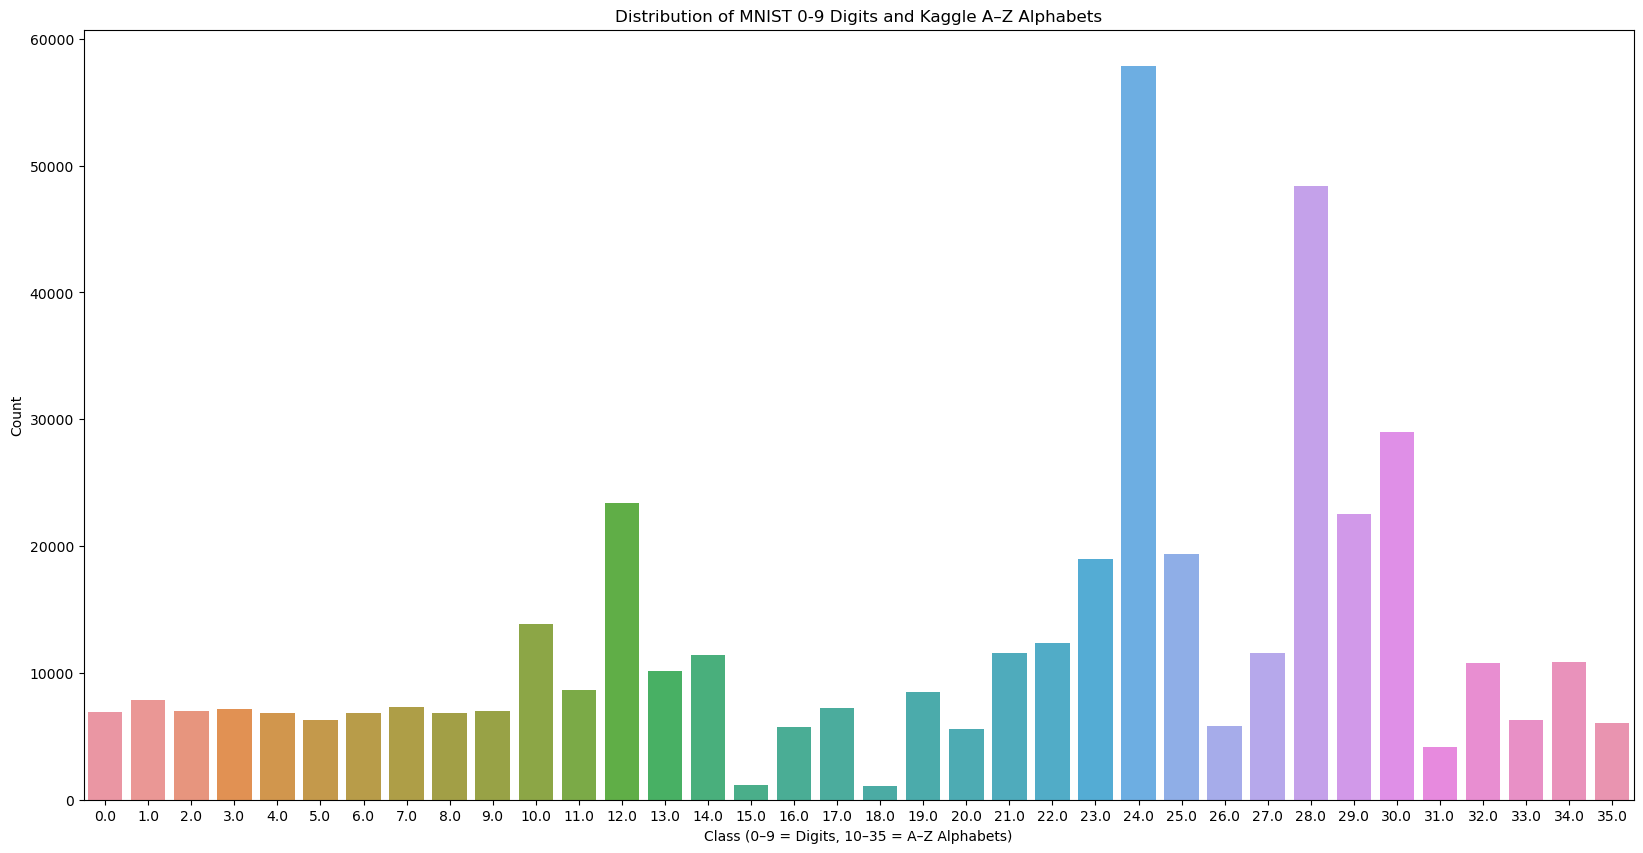

In [10]:
# Visualize the combined label distribution
plt.figure(figsize = (20, 10))
sns.countplot(x = pd.Series(labels))
plt.xlabel("Class (0–9 = Digits, 10–35 = A–Z Alphabets)")
plt.ylabel("Count")
plt.title("Distribution of MNIST 0-9 Digits and Kaggle A–Z Alphabets")
plt.show()

In [11]:
# Convert data to float32 (needed for TensorFlow, saves memory vs float64)
data = np.array(data, dtype='float32')

# Add a channel dimension at the end -> (N, 28, 28, 1) channels = 1 since images are grayscale
# CNNs expect images with shape (height, width, channels)
data = np.expand_dims(data, axis=-1)
data.shape

(442450, 28, 28, 1)

In [12]:
# -----------------------
# Pre-processing the data
# -----------------------

print(data[0].min(), data[0].max())
data /= 255.0  # Normalize the image data to the range [0, 1] by dividing by 255
print(data[0].min(), data[0].max())

np.unique(labels), len(np.unique(labels))

0.0 255.0
0.0 1.0


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

In [13]:
# Convert categorical labels into one-hot encoded vectors
le = LabelBinarizer()
labels = le.fit_transform(labels)
np.unique(labels)

array([0, 1])

In [14]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
labels[30000], len(labels[30000])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36)

(28, 28, 1)


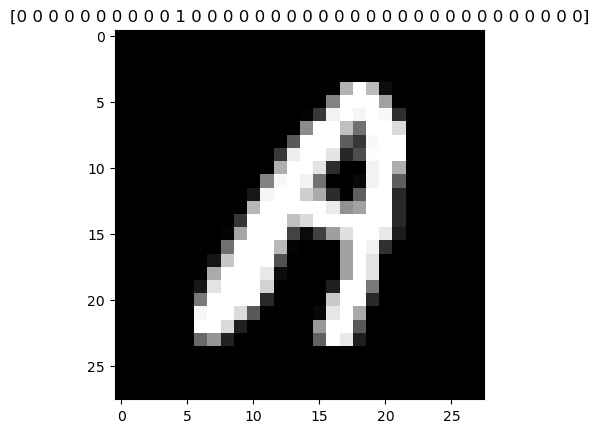

In [35]:
# Visualize One Sample
print(data[0].shape)
plt.imshow(data[0].reshape(28,28), cmap='gray')
plt.title(str(labels[0]));

In [37]:
# Count how many samples belong to each class
classes_total = labels.sum(axis = 0)
print(classes_total)

# Compute class weights to handle class imbalance
classes_weights = {}
for i in range(0, len(classes_total)):
    classes_weights[i] = classes_total.max() / classes_total[i]
print(classes_weights)

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

[ 6903  7877  6990  7141  6824  6313  6876  7293  6825  6958 13869  8668
 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586 12336 19010
 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272 10859  6076]
{0: 8.376792698826597, 1: 7.340992763742541, 2: 8.272532188841202, 3: 8.097605377398123, 4: 8.473769050410317, 5: 9.15967052114684, 6: 8.409685863874346, 7: 7.928835870012341, 8: 8.472527472527473, 9: 8.310577752227651, 10: 4.169370538611291, 11: 6.671089063221043, 12: 2.4702037677816224, 13: 5.7060390763765545, 14: 5.0546328671328675, 15: 49.72055030094583, 16: 10.035577924331829, 17: 8.011221945137157, 18: 51.629464285714285, 19: 6.808548216178029, 20: 10.320364090665715, 21: 4.990937338166753, 22: 4.6875, 23: 3.0418200946870066, 24: 1.0, 25: 2.989762680316426, 26: 9.94924294562973, 27: 4.999567698426422, 28: 1.1942625828703608, 29: 2.5705712380529007, 30: 1.993415609487038, 31: 13.827116212338593, 32: 5.362110534124629, 33: 9.21954719387755, 34: 5.3250759738465785, 3

((353960, 28, 28, 1), (88490, 28, 28, 1), (353960, 36), (88490, 36))

In [39]:
# ------------------------
# Build the neural network
# ------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Initialize a sequential CNN model (a linear stack of layers)
network = Sequential()

'''
Convolutional & Pooling Layers
'''
# 1st convolution layer: extract low-level features (edges, corners, simple lines)
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# 1st pooling layer: reduce spatial size and computation
network.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer: extract mid-level features (curves, strokes, local patterns)
network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
# 2nd pooling layer: further downsample feature maps
network.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer: capture more complex high-level features (character shapes, complex structures)
network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
# 3rd pooling layer: compress feature representation
network.add(MaxPool2D(pool_size=(2,2)))

'''
Fully Connected (Dense) Layers
'''
# Flatten the 3D feature maps into a 1D vector for the dense layers
network.add(Flatten())

network.add(Dense(64, activation = 'relu'))   # 1st dense layer: learn non-linear feature combinations
network.add(Dense(128, activation = 'relu'))  # 2nd dense layer: strengthen abstract feature representation
network.add(Dense(36, activation='softmax'))  # Output layer: predict probabilities for 36 classes

'''
Compile the Model
'''
# Configure the model with loss function, optimizer, and evaluation metric
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Display model architecture summary
network.summary()

/Users/vincy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,468 (540.89 KB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# ---------------------------
# Training the neural network
# ---------------------------

from tensorflow.keras.callbacks import ModelCheckpoint               # ModelCheckpoint: saves the best model during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ImageDataGenerator: performs on-the-fly data augmentation

file_model = 'custom_ocr.keras'  # File name for saving the best model
epochs = 20                      # Number of training iterations (full passes through the dataset)
batch_size = 128                 # Number of samples per gradient update

# Save the model only when the validation loss improves
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

# Generate augmented images with small random transformations to prevent overfitting and improve model robustness
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Train the model using the augmented data generator
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test), epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20


/Users/vincy/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2766/2766 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9163 - loss: 0.7931
Epoch 1: val_loss improved from inf to 0.21511, saving model to custom_ocr.keras
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 181s 66ms/step - accuracy: 0.9163 - loss: 0.7931 - val_accuracy: 0.9198 - val_loss: 0.2151
Epoch 2/20
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9220 - loss: 0.7121
Epoch 2: val_loss improved from 0.21511 to 0.20584, saving model to custom_ocr.keras
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 178s 64ms/step - accuracy: 0.9220 - loss: 0.7121 - val_accuracy: 0.9204 - val_loss: 0.2058
Epoch 3/20
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9281 - loss: 0.6590
Epoch 3: val_loss did not improve from 0.20584
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 177s 64ms/step - accuracy: 0.9281 - loss: 0.6590 - val_accuracy: 0.8835 - val_loss: 0.2743
Epoch 4/20
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9294 - loss: 0.6102
Epoch 4: val_loss did not improve from 0.20584
2766/2766 ━━━━━━━━━━━━━━━━━━━

In [47]:
# -----------------------------
# Evaluating the neural network
# -----------------------------

# Create a list of class labels: Digits (0–9) + Uppercase English letters (A–Z) = total 36 classes
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
print(name_labels)

# Use the trained model to predict class probabilities for the test set
predictions = network.predict(X_test, batch_size=batch_size)
predictions 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
692/692 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


array([[4.6672615e-01, 3.7087162e-07, 7.7376221e-09, ..., 1.6987825e-14,
        1.0920526e-07, 6.4483358e-10],
       [9.4586443e-16, 2.6542879e-10, 4.9315271e-14, ..., 2.4679315e-14,
        1.1084251e-11, 1.8485170e-12],
       [9.5038378e-12, 8.1805794e-08, 5.8911209e-10, ..., 2.4405935e-07,
        8.5072358e-08, 1.1492922e-13],
       ...,
       [4.3692747e-01, 3.7899738e-08, 3.3464814e-06, ..., 9.9850243e-15,
        1.1593255e-08, 4.8852336e-09],
       [2.4700921e-25, 5.8929511e-13, 1.4138122e-09, ..., 9.9996746e-01,
        7.5111352e-06, 4.4607953e-11],
       [5.8829039e-07, 5.6927379e-13, 1.0145327e-08, ..., 3.2220503e-16,
        3.8221959e-08, 1.2120974e-10]], dtype=float32)

In [49]:
# Display the prediction vector for the first test image
predictions[0]

array([4.6672615e-01, 3.7087162e-07, 7.7376221e-09, 1.7922972e-08,
       4.6684026e-09, 2.3006012e-07, 6.3054763e-06, 2.8601031e-08,
       4.3192323e-08, 5.9513222e-06, 8.2022451e-09, 7.4172270e-08,
       2.3870568e-06, 4.9594096e-03, 1.5003413e-09, 1.1128904e-15,
       1.1553084e-08, 3.3127754e-12, 2.1534110e-13, 3.9100169e-06,
       2.5283733e-12, 1.4022426e-10, 9.7874725e-08, 1.0539060e-05,
       5.2803367e-01, 1.5658412e-05, 1.1051116e-04, 5.0998247e-11,
       7.0204243e-07, 6.8597186e-09, 1.2370774e-04, 8.1401455e-11,
       1.4961194e-07, 1.6987825e-14, 1.0920526e-07, 6.4483358e-10],
      dtype=float32)

In [51]:
# Find the predicted class index and corresponding label with the highest predicted probability for the first image
print(np.argmax(predictions[0]), name_labels[np.argmax(predictions[0])])

24 O


In [53]:
# Show the true one-hot encoded label for the same test image
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# Convert one-hot label to class index and print the actual class name
print(np.argmax(y_test[0]), name_labels[np.argmax(y_test[0])])

24 O


In [57]:
# Compute and display the model's loss and accuracy on the test dataset
network.evaluate(X_test, y_test)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9583 - loss: 0.1306


[0.13083741068840027, 0.9581082463264465]

In [59]:
# Print a detailed classification report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.41      0.61      0.49      1381
           1       0.98      0.99      0.98      1575
           2       0.93      0.96      0.94      1398
           3       0.98      0.99      0.98      1428
           4       0.96      0.94      0.95      1365
           5       0.81      0.91      0.86      1263
           6       0.97      0.96      0.97      1375
           7       0.95      0.99      0.97      1459
           8       0.96      0.99      0.98      1365
           9       0.96      0.99      0.97      1392
           A       0.99      1.00      0.99      2774
           B       0.98      0.99      0.99      1734
           C       0.98      0.98      0.98      4682
           D       0.92      0.97      0.94      2027
           E       0.97      0.99      0.98      2288
           F       0.97      0.98      0.98       233
           G       0.97      0.94      0.96      1152
           H       0.98    

In [61]:
# Check what metrics were recorded during training
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

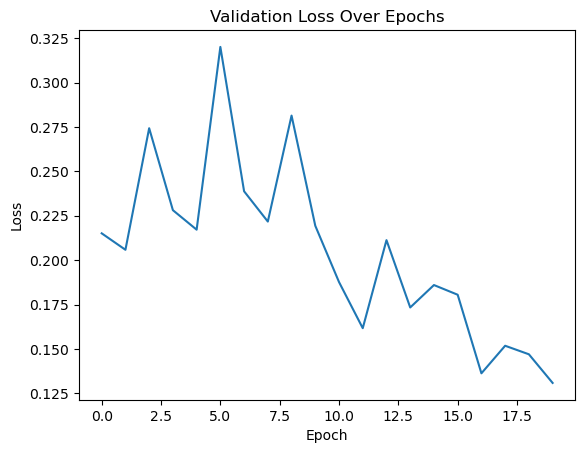

In [63]:
# Plot the validation loss curve across epochs
plt.plot(history.history['val_loss']);
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

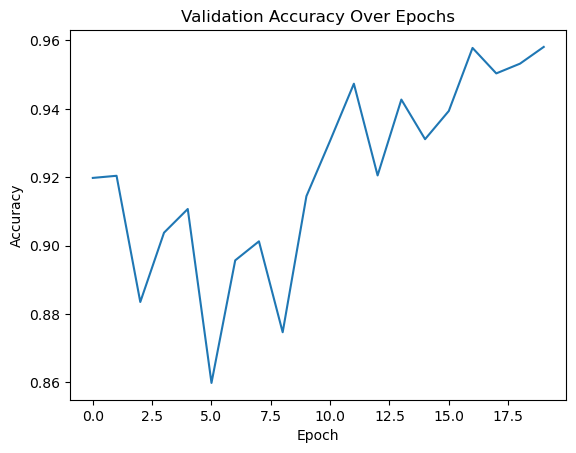

In [65]:
# Plot the validation accuracy curve across epochs
plt.plot(history.history['val_accuracy']);
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()